In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('nnl1_metrics_flickrdata_2.csv').drop(['model', 'delta', 'proc_time'], axis=1)
data = df.to_numpy()

In [21]:
df

,mse,psnr,ssim_scores,lpips,lambda
0,0.019072,17.196068,0.700642,0.452831,3.000000e-08
1,0.019072,17.196066,0.700641,0.452833,7.000000e-08
2,0.019072,17.196066,0.700641,0.452834,3.000000e-07
3,0.019072,17.196066,0.700641,0.452834,7.000000e-07
4,0.019072,17.196066,0.700641,0.452834,3.000000e-06
...,...,...,...,...,...
155,0.014646,18.342892,0.638173,0.522848,7.000000e-03
156,0.014646,18.342892,0.638173,0.522848,3.000000e-02
157,0.014646,18.342892,0.638173,0.522848,7.000000e-02
158,0.014646,18.342892,0.638173,0.522848,3.000000e-01


In [22]:
mmets = np.vstack([np.mean(data[np.where(data[:-1] == val), :][0], axis=0) for val in sorted(list(set(data[:,-1])))])

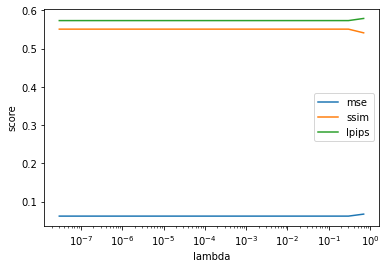

In [23]:
plt.plot(mmets[:,-1], mmets[:,0], label='mse')
plt.plot(mmets[:,-1], mmets[:,2], label='ssim')
plt.plot(mmets[:,-1], mmets[:,3], label='lpips')
plt.ylabel('score')
plt.xlabel('lambda')
plt.xscale('log', base=10)
plt.legend()
plt.savefig('nnl1_metrics.png')

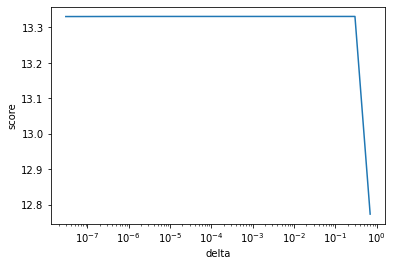

In [25]:
plt.plot(mmets[:,-1], mmets[:,1], label='psnr')
plt.ylabel('score')
plt.xlabel('delta')
plt.xscale('log', base=10)
plt.savefig('nnl1_psnr.png')

In [4]:
all_df = pd.read_csv('../all_metrics_flickrdata.csv')

In [5]:
all_df

,mse,psnr,ssim,lpips,time,model,lambda,delta
0,0.174524,7.581461,0.415312,0.700691,49.825073,lasso,0.001,0.0055
1,0.109071,9.622900,0.439552,0.802271,29.332185,dct,0.005,0.0055
2,0.151677,8.190803,0.444622,0.753148,32.682410,nnL1,0.010,0.0055
3,0.183071,7.373805,0.416913,0.702255,146.980003,huber,1.000,0.0055
4,0.059624,12.245755,0.488764,0.528553,51.045235,lasso,0.001,0.0055
...,...,...,...,...,...,...,...,...
498,0.014250,18.462003,0.614816,0.473528,49.488841,nnL1,0.010,0.0055
499,0.017339,17.609745,0.621855,0.419670,206.452262,huber,1.000,0.0055
500,0.049028,13.095534,0.602182,0.409665,52.606618,lasso,0.001,0.0055
501,0.050480,12.968788,0.499137,0.599618,37.944278,dct,0.005,0.0055


In [7]:
all_df.groupby('model').mean()

,mse,psnr,ssim,lpips,time,lambda,delta
model,,,,,,,
dct,0.077369,12.450281,0.505748,0.696901,37.139668,0.005,0.0055
huber,0.105535,11.910339,0.490600,0.564711,167.279153,1.000,0.0055
lasso,0.099191,12.087703,0.495113,0.556511,50.512204,0.001,0.0055
nnL1,0.091973,12.315650,0.517473,0.607909,38.719848,0.010,0.0055
